# Integration of Mergesort & Insertion Sort

In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer S as a threshold for the size of subarrays. Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

## Below is the implementation of a typical merge sort algorithm

In [1]:
import random

def merge_sort(arr):
    if len(arr) <= 1:
        return arr, 0

    comp = 0
    mid = len(arr) // 2
    l_half = arr[:mid]
    r_half = arr[mid:]

    l_half, l = merge_sort(l_half)
    r_half, r = merge_sort(r_half)
    comp += l + r
    
    result = []
    l_idx, r_idx = 0, 0

    while l_idx < len(l_half) and r_idx < len(r_half):
        if l_half[l_idx] < r_half[r_idx]:
            result.append(l_half[l_idx])
            l_idx += 1
        else:
            result.append(r_half[r_idx])
            r_idx += 1
        comp += 1

    result.extend(l_half[l_idx:])
    result.extend(r_half[r_idx:])

    return result, comp

arr = [0, 5, 6, 2, 1, 8, 7, 4, 3, 9]
sorted_arr, comp = merge_sort(arr)
print("Sorted array is: ", sorted_arr)
print("number of comparisons: ", comp)

Sorted array is:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
number of comparisons:  23


## Below is the implementation of a typical insertion sort algorithm.

In [2]:
def insertion_sort(arr):
    comp = 0
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1

        while j >= 0 and arr[j] > key:
            comp += 1
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

    return arr, comp

arr = [0, 5, 6, 2, 1, 8, 7, 4, 3, 9]
sorted_arr, comp = insertion_sort(arr)
print("Sorted array is: ", sorted_arr)
print("number of comparisons: ", comp)

Sorted array is:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
number of comparisons:  15


## Below is the implementation of the hybrid merge-insertion sort algorithm. 

The idea is to set a small integer S as a threshold for the size of subarrays. Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, the algorithm will switch to Insertion Sort, which is efficient for small-sized input. for this sample, s is set to 5.

In [3]:
def merge_insertion_sort(arr, s):
    if len(arr) <= s:
        return insertion_sort(arr)

    comp = 0
    mid = len(arr) // 2
    l_half = arr[:mid]
    r_half = arr[mid:]

    l_half, l = merge_insertion_sort(l_half, s)
    r_half, r = merge_insertion_sort(r_half, s)
    comp += l + r
    
    result = []
    l_idx, r_idx = 0, 0

    while l_idx < len(l_half) and r_idx < len(r_half):
        if l_half[l_idx] < r_half[r_idx]:
            result.append(l_half[l_idx])
            l_idx += 1
        else:
            result.append(r_half[r_idx])
            r_idx += 1
        comp += 1

    result.extend(l_half[l_idx:])
    result.extend(r_half[r_idx:])

    return result, comp

arr = [0, 5, 6, 2, 1, 8, 7, 4, 3, 9]
sorted_arr, comp = merge_insertion_sort(arr, 5)
print("Sorted array is: ", sorted_arr)
print("number of comparisons: ", comp)

Sorted array is:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
number of comparisons:  18


## Below is the implementation of a simple int array generator

In [27]:
def generate_arr(size, smallest, largest):
    arr = []
    for i in range(0, size):
        arr.append(random.randint(smallest, largest))
        
    return arr

arr = generate_arr(20, 0, 50)

sorted_arr, comp = merge_insertion_sort(arr, 4)
print("Sorted array is:", sorted_arr)
print("number of comparisons: ", comp)

arr = generate_arr(1000, 0, 1000)

sorted_arr, comp = merge_insertion_sort(arr, 4)
print("number of comparisons: ", comp)

Sorted array is: [2, 2, 3, 5, 9, 14, 15, 17, 20, 20, 20, 25, 27, 32, 35, 38, 39, 41, 43, 44]
number of comparisons:  51
number of comparisons:  8257


## i. With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.

Now it is time to generate arrays of increasing sizes, in a range from 1,000 to 10 million. Below, arr will contain 1000, 2000, 3000, ... 9 000 000, 10 000 000 int numbers. Then to record the number of key comparisons using merge-insertion sort. S is fixed to 10

In [33]:
# note to self: PLEASE DONT RUN THIS FREQUENTLY, ITS SUPER CPU INTENSIVE for 15 mins

key_comparisons = []

for i in range(3, 7):
    for j in range(1, 11):
        arr = generate_arr(10**i * j, 0, 10**i)
        sorted_arr, comp = merge_insertion_sort(arr, 10)
        key_comparisons.append(comp)

print("list of key comparisons: ")
for i in key_comparisons:
    print(i)

list of key comparisons: 
8420
19045
29782
41875
54964
65609
78599
91845
105821
120336
120551
259756
400423
559527
699041
860167
1026835
1200392
1333105
1498049
1498966
3196428
5051575
6793012
8712634
10702600
12519396
14385395
16384012
18421876
18421418
38844949
59620621
81692807
104723580
125245227
148070827
171377513
195175622
219435063


,key_comparisons,index
key_comparisons,1.000000,0.735256
index,0.735256,1.000000


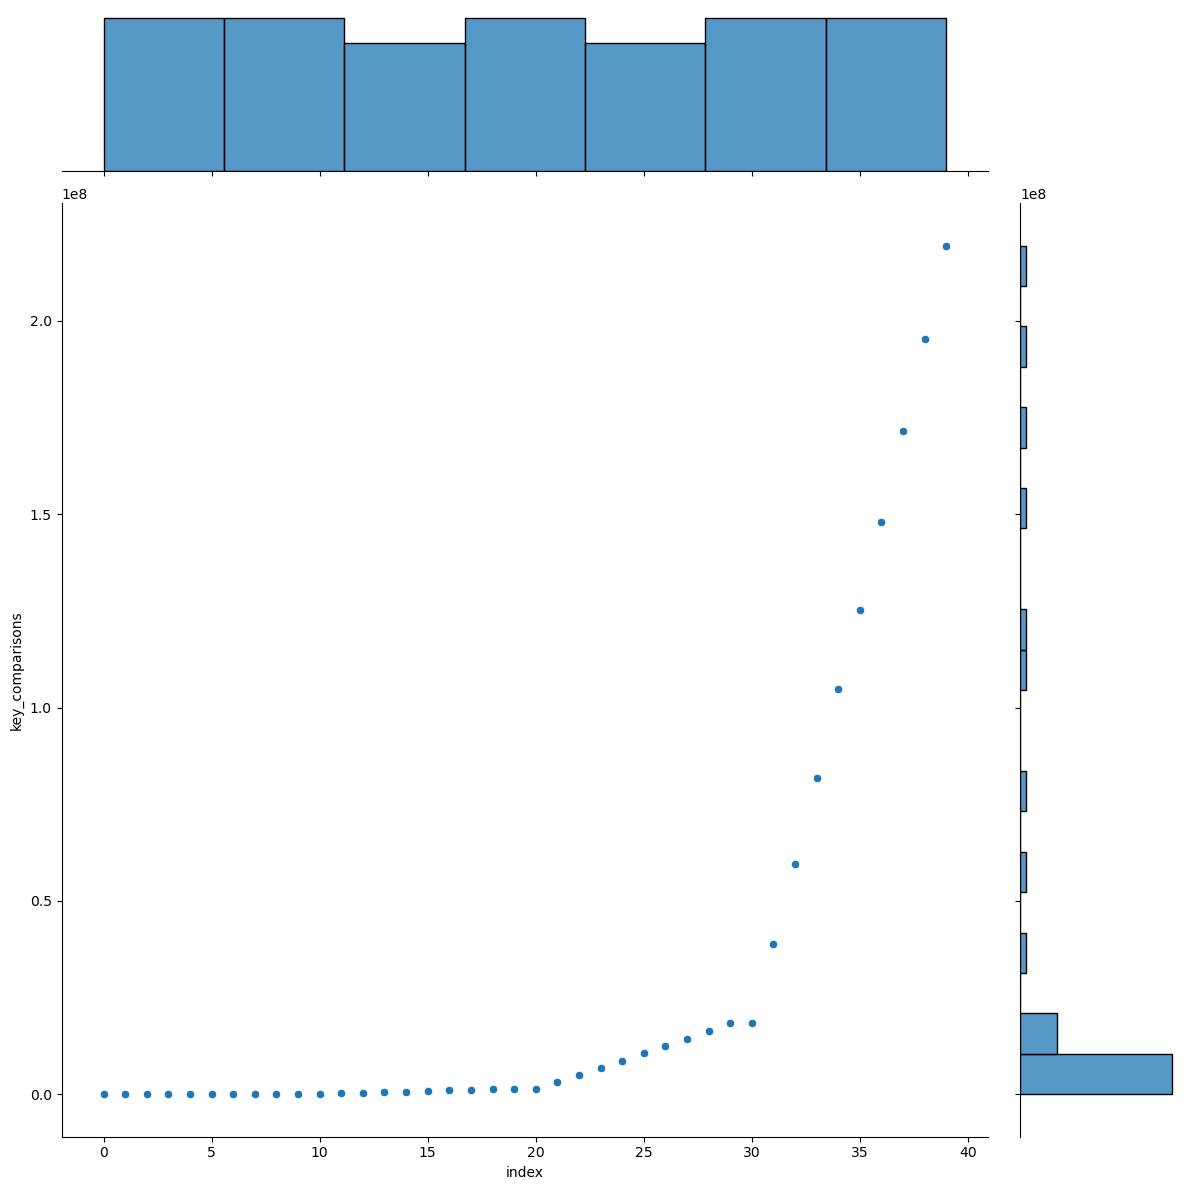

In [36]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

pd_key_comp = pd.DataFrame({'key_comparisons': key_comparisons})
pd_key_comp['index'] = pd_key_comp.index

sb.jointplot(data = pd_key_comp, x = 'index', y = "key_comparisons", height = 12)
pd_key_comp.corr()

Theoretically mergesort has a time complexity of O(nlogn) and insertion sort time complexity O(n^2). So with the hybrid algorithm, the time complexity is exponential. here we observe that the number of comparisons rise exponentially when the number of items in the array rises linearly. Thus this evidence supports the notion that merge-insertion sort has an exponential function

## ii. With the input size n fixed, plot the number of key comparisons over different values of S

n shall be fixed to 10000, S shall increase linearly from 1 to 100.

In [51]:
key_comparisons = []

for s in range(1, 51):
        arr = generate_arr(10000, 0, 10000)
        sorted_arr, comp = merge_insertion_sort(arr, s)
        key_comparisons.append(comp)

print("list of key comparisons: ")
for i in key_comparisons:
    print(i)

list of key comparisons: 
120397
118315
117187
116985
116173
116208
116044
116132
116808
119754
119848
120089
120270
120017
119810
120156
120069
120334
126819
135152
135340
134895
135446
134897
134983
135244
135240
135080
134809
135274
136032
134808
135476
135539
135114
135294
135576
133934
172032
174717
174259
174971
174639
173603
174693
175428
174014
174774
176316
174673


,key_comparisons,s_size
key_comparisons,1.000000,0.896966
s_size,0.896966,1.000000


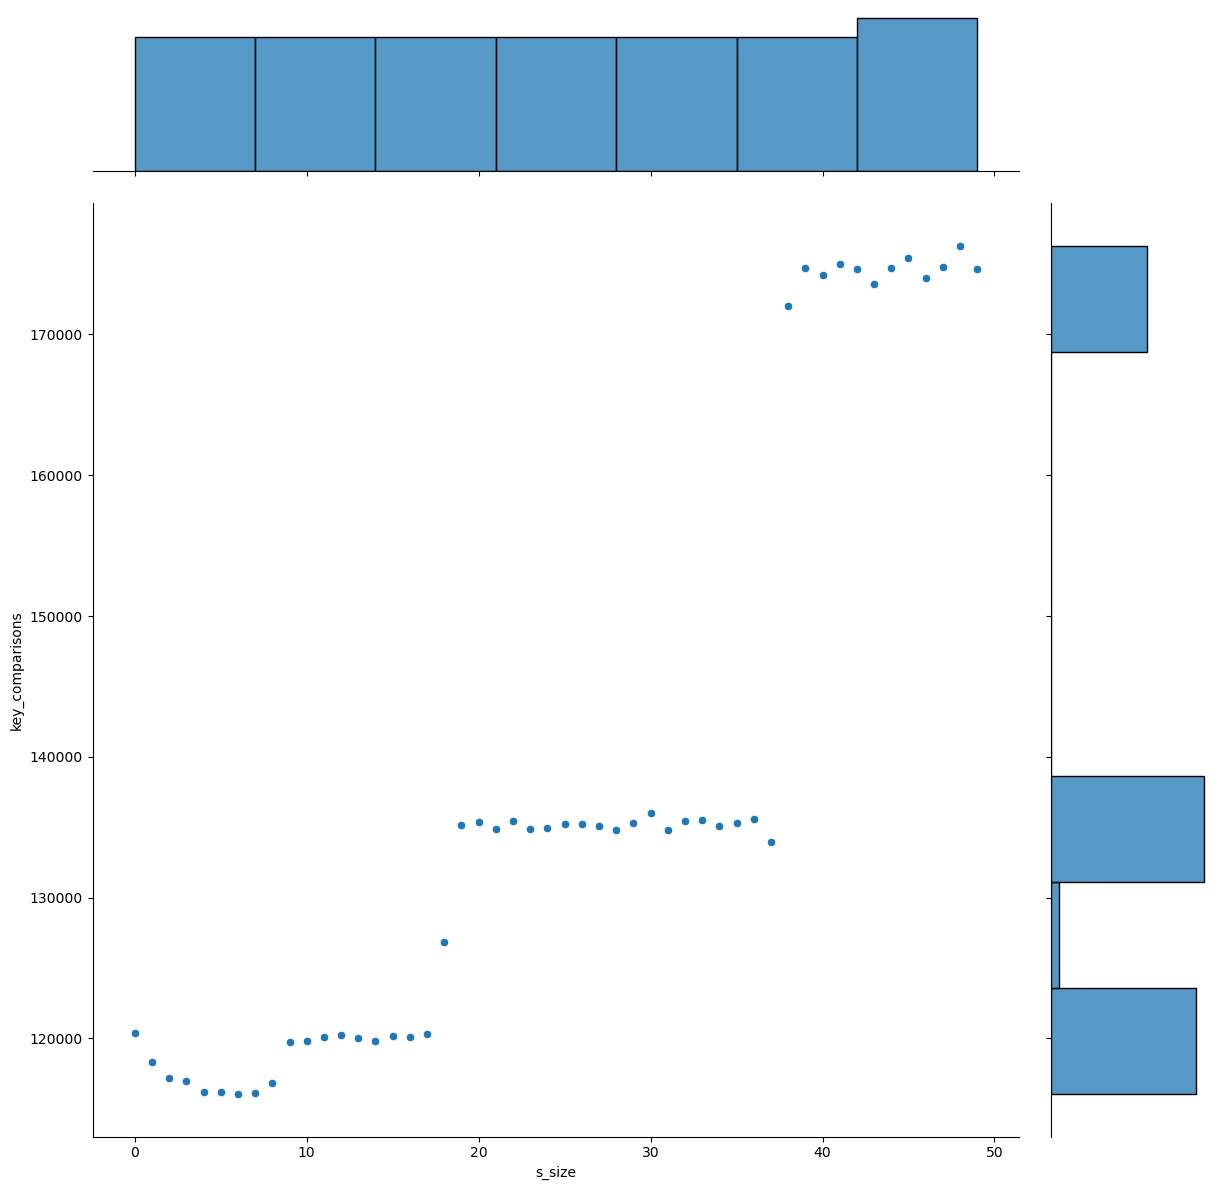

In [52]:
pd_key_comp = pd.DataFrame({'key_comparisons': key_comparisons})
pd_key_comp['s_size'] = pd_key_comp.index

sb.jointplot(data = pd_key_comp, x = 's_size', y = "key_comparisons", height = 12)
pd_key_comp.corr()

In [53]:
key_comparisons = []

for s in range(1, 51):
        arr = generate_arr(1000, 0, 1000)
        sorted_arr, comp = merge_insertion_sort(arr, s)
        key_comparisons.append(comp)

print("list of key comparisons: ")
for i in key_comparisons:
    print(i)

list of key comparisons: 
8684
8444
8449
8293
8266
8353
8332
8485
8420
8510
8478
8437
8429
8444
8775
9579
9413
9559
9485
9564
9389
9570
9414
9382
9575
9604
9592
9633
9361
9512
11606
12502
12706
12164
12521
12680
12789
12466
12432
12363
12376
12818
12630
12431
12533
12702
12618
12382
12346
12593


,key_comparisons,s_size
key_comparisons,1.000000,0.922608
s_size,0.922608,1.000000


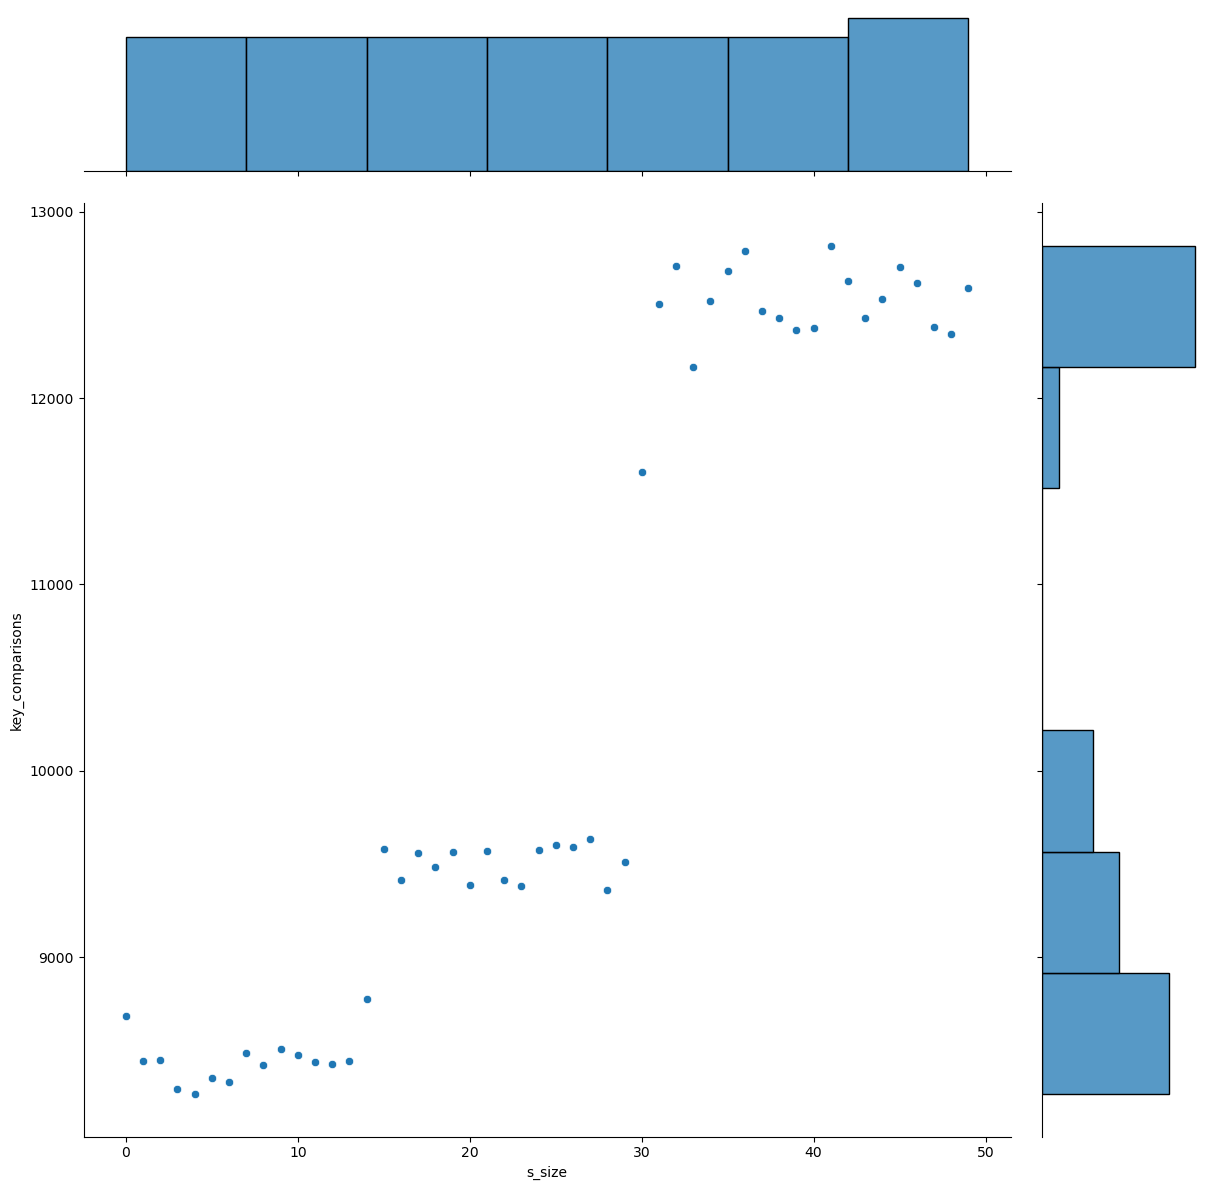

In [54]:
pd_key_comp = pd.DataFrame({'key_comparisons': key_comparisons})
pd_key_comp['s_size'] = pd_key_comp.index

sb.jointplot(data = pd_key_comp, x = 's_size', y = "key_comparisons", height = 12)
pd_key_comp.corr()